In [20]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

# 设置 Matplotlib 在 Notebook 中内联显示图像
%matplotlib inline

In [21]:
# --- 1. 定义文件路径 ---
base_data_dir = "/home/zhendong/MVDoppler-Pose/Data/dataset/"
folder = "2022Jul13-1744"
episode = "20220713174516"
radar_h5_path = os.path.join(base_data_dir, folder, 'radar_v2', episode + '.h5')

print(f"将要加载的雷达文件路径: {radar_h5_path}")

# --- 2. 定义归一化所需的统计数据 ---
# 这些值来自你最初提供的配置文件
# 雷达通道1 (索引0) 的统计量
RADAR1_DOP_MEAN = 2.8967
RADAR1_DOP_STD = 2.4292
RADAR1_RNG_MEAN = 43.9563
RADAR1_RNG_STD = 3.2869

# 雷达通道2 (索引1) 的统计量
RADAR2_DOP_MEAN = 2.9696
RADAR2_DOP_STD = 2.3260
RADAR2_RNG_MEAN = 44.2900
RADAR2_RNG_STD = 3.3434

将要加载的雷达文件路径: /home/zhendong/MVDoppler-Pose/Data/dataset/2022Jul13-1744/radar_v2/20220713174516.h5


In [22]:
# --- 3. 加载原始数据 ---
try:
    with h5py.File(radar_h5_path, 'r') as hf:
        raw_radar_dat = np.array(hf.get('radar_dat'))
        raw_radar_rng = np.array(hf.get('radar_rng'))
    print("原始数据加载成功！")
    print(f"原始 'radar_dat' 形状: {raw_radar_dat.shape}")
    print(f"原始 'radar_rng' 形状: {raw_radar_rng.shape}")

    # --- 4. 执行Z-Score归一化 ---
    # 创建副本以进行归一化操作，保留原始数据
    normalized_radar_dat = raw_radar_dat.copy().astype(np.float64)
    normalized_radar_rng = raw_radar_rng.copy().astype(np.float64)

    # 对 Micro-Doppler 数据进行归一化
    # 通道 0 (Radar 1)
    normalized_radar_dat[:, :, 0] = (normalized_radar_dat[:, :, 0] - RADAR1_DOP_MEAN) / RADAR1_DOP_STD
    # 通道 1 (Radar 2)
    normalized_radar_dat[:, :, 1] = (normalized_radar_dat[:, :, 1] - RADAR2_DOP_MEAN) / RADAR2_DOP_STD

    # 对 Range-Time 数据进行归一化
    # 通道 0 (Radar 1)
    normalized_radar_rng[:, :, 0] = (normalized_radar_rng[:, :, 0] - RADAR1_RNG_MEAN) / RADAR1_RNG_STD
    # 通道 1 (Radar 2)
    normalized_radar_rng[:, :, 1] = (normalized_radar_rng[:, :, 1] - RADAR2_RNG_MEAN) / RADAR2_RNG_STD
    
    print("\n数据归一化完成！")

except Exception as e:
    print(f"处理文件时发生错误: {e}")

原始数据加载成功！
原始 'radar_dat' 形状: (128, 1985, 2)
原始 'radar_rng' 形状: (250, 128, 2)

数据归一化完成！


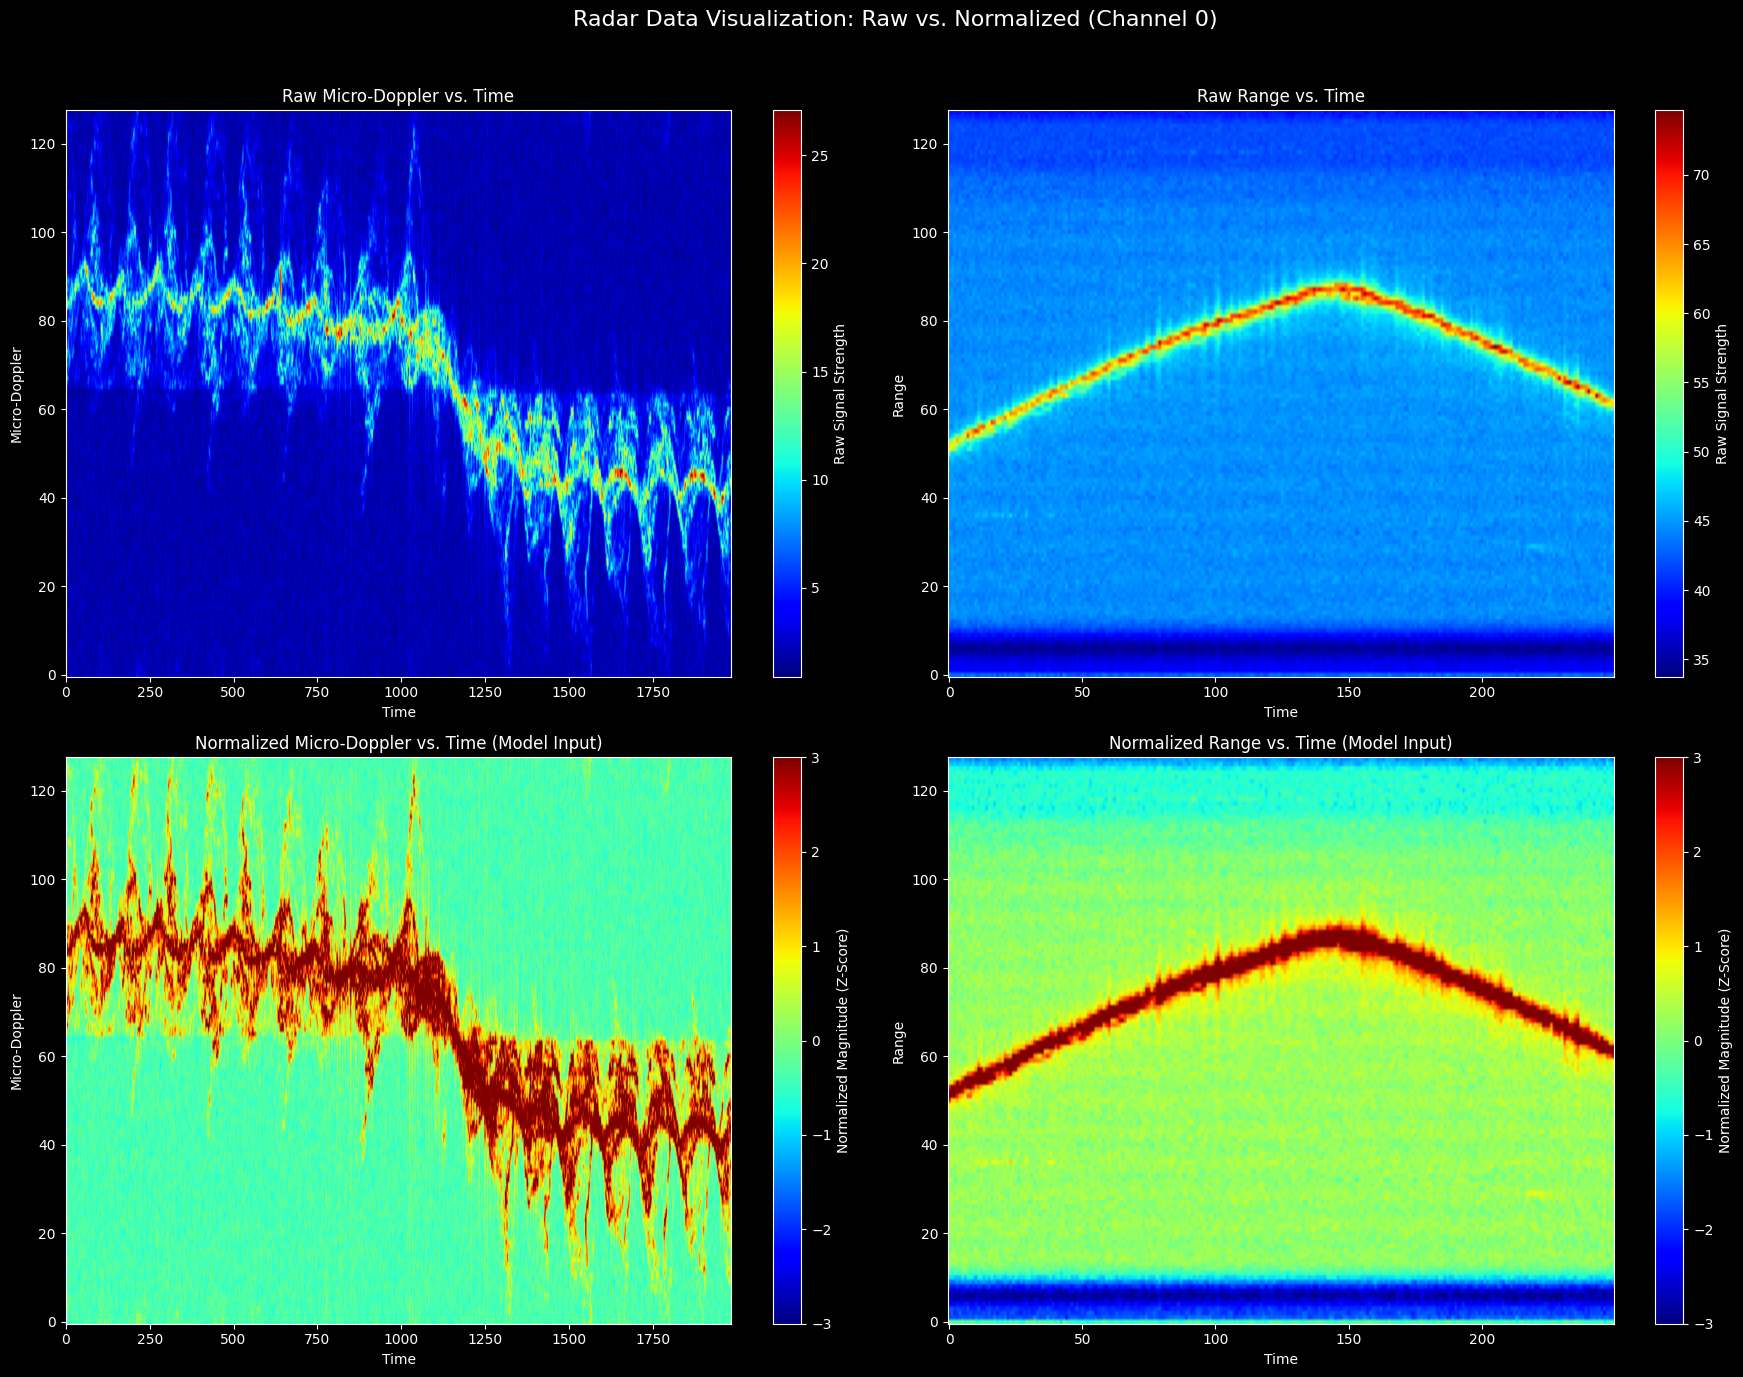

In [25]:
# --- 5. 对比可视化 (仅显示通道0) ---

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Radar Data Visualization: Raw vs. Normalized (Channel 0)', fontsize=16)

# --- 上排: 原始数据 ---

# 1. 原始 Micro-Doppler
raw_dop_plot = raw_radar_dat[:, :, 0]
im1 = axes[0, 0].imshow(raw_dop_plot, aspect='auto', cmap='jet', origin='lower')
axes[0, 0].set_title('Raw Micro-Doppler vs. Time')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Micro-Doppler')
fig.colorbar(im1, ax=axes[0, 0], label='Raw Signal Strength')

# 2. 原始 Range-Time
raw_rng_plot = raw_radar_rng[:, :, 0].T  # 转置以匹配坐标轴
im2 = axes[0, 1].imshow(raw_rng_plot, aspect='auto', cmap='jet', origin='lower')
axes[0, 1].set_title('Raw Range vs. Time')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Range')
fig.colorbar(im2, ax=axes[0, 1], label='Raw Signal Strength')


# --- 下排: 归一化数据 ---

# 3. 归一化 Micro-Doppler
norm_dop_plot = normalized_radar_dat[:, :, 0]
# 使用 vmin 和 vmax 来更好地显示 Z-Score 的范围
im3 = axes[1, 0].imshow(norm_dop_plot, aspect='auto', cmap='jet', origin='lower', vmin=-3, vmax=3)
axes[1, 0].set_title('Normalized Micro-Doppler vs. Time (Model Input)')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Micro-Doppler')
fig.colorbar(im3, ax=axes[1, 0], label='Normalized Magnitude (Z-Score)')

# 4. 归一化 Range-Time
norm_rng_plot = normalized_radar_rng[:, :, 0].T # 转置以匹配坐标轴
im4 = axes[1, 1].imshow(norm_rng_plot, aspect='auto', cmap='jet', origin='lower', vmin=-3, vmax=3)
axes[1, 1].set_title('Normalized Range vs. Time (Model Input)')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Range')
fig.colorbar(im4, ax=axes[1, 1], label='Normalized Magnitude (Z-Score)')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # 调整布局以适应主标题
plt.show()